# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

<p style="text-align:justify"> Traffic accidents in the Kingdom of Saudi Arabia have been increased last years. Many people lost their health and cars. Also, the hospitals have overloaded due to emergency cases. The economy will be affected in the long term if accidents are ongoing. The aim of this project is to investigate the reasons for a traffic accident with driving licenses to provide highly efficient recommendations in order to reduce injuries and casualties on the road. </p>

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

<p style="text-align:justify">This project focuses on data of traffic accidents with driving licenses in the Kingdom of Saudi Arabia, which provides the number of traffic accidents and issued driving licenses per region yearly. Currently, traffic accidents and driving licenses have been increased in the last years. As a result, the General Department of Traffic has lost little control over traffic accidents. So, the objective of this project is to enhance control. The project conducts on the data analyzing process and data.</p>
Exploratory data analysis, descriptive and inferential statistics produce the findings:
<ol>
    <li>The top 3 regions on traffic accidents in 2017 are Makkah(%31.6), Riyadh (%21.69) and Eastern Region (%17.68).</li>
    <li>The highest region on issued driving licenses in 2017 is Riyadh by 495,307 licenses (%53.36).</li>
    <li>The top 3 region on number of casualties in 2016 are Makkah (31%), Eastern Region (%12.73) and Riyadh (%11.95).</li>
    <li>The traffic accidents and issued driving licenses are postive skewed due to certain regions are huge compared the rest regions.</li>
</ol>
<p style="text-align:justify">&nbsp;&nbsp;&nbsp;Based on the findings, it is recommended that focuses on the infrastructure of roads and emphasizes the traffic rules on main roads for top 3 regions. Also, adds more restrictions on issued driving licenses. Those recommendations will save people from traffic accidents and encourage safe driving.</p>

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

sns.set_style('whitegrid')
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code
traffic_accidents_df = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv',delimiter=';')
driving_licenses_df = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv',delimiter=';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code
traffic_accidents_df.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [4]:
#Code
driving_licenses_df.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

<b style="color:blue;">Answer:</b>

*note*:  We ignored `Unnamed:0` and `Unnamed:0.1` because they are duplicated indexing fields.

##### 3.a saudi-arabia-traffic-accidents-2008 dataset

|No. Field|Field Name|Description|
|--|--|--|
|1|Year|Year of traffic accident.|
|2|Region|Region of traffic accident in Saudi Arabia.|
|3|Indicator|Indicate the type of traffic accident.|
|4|Value|Number of each traffic accident type.|
|5|geo_point_2d|The geolocation of region in Saudi Arabia.|

<br>

##### 3.b saudi-arabia-driving-licenses-2004-2008 dataset

|No. Field|Field Name|Description|
|--|--|--|
|1|Year|Year of issuance driving licenses.|
|2|Administritive Area|Administritive Area in Saudi Arabia.|
|3|Driving Liceses|Number of issuanced driving licenses.|
|4|geo_point_2d|The geolocation of administritive area in Saudi Arabia.|

#### 4a. How complete is the data?

Investigate missing values etc.

In [5]:
#Code
null_traffic_accidents_df = pd.DataFrame(traffic_accidents_df.isnull().sum())
null_traffic_accidents_df[0].sort_values(ascending = False)

geo_point_2d    6
Value           0
Indicator       0
Region          0
Year            0
Unnamed: 0.1    0
Unnamed: 0      0
Name: 0, dtype: int64

<b style="color:blue;">Answer:</b>  The `geo_point_2d` has 6 missing values.

In [6]:
#Code
null_driving_licenses_df = pd.DataFrame(driving_licenses_df.isnull().sum())
null_driving_licenses_df[0].sort_values(ascending = False)

geo_point_2d           25
Driving Liceses         0
Administritive Area     0
Year                    0
Unnamed: 0              0
Name: 0, dtype: int64

<b style="color:blue;">Answer:</b>  The `geo_point_2d` has 25 missing values.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [7]:
#Code
driving_licenses_df.describe()

,Unnamed: 0
count,350.000000
mean,174.500000
std,101.180532
min,0.000000
25%,87.250000
50%,174.500000
75%,261.750000
max,349.000000


In [8]:
traffic_accidents_df.describe()

,Unnamed: 0,Unnamed: 0.1
count,84.000000,84.000000
mean,41.500000,41.500000
std,24.392622,24.392622
min,0.000000,0.000000
25%,20.750000,20.750000
50%,41.500000,41.500000
75%,62.250000,62.250000
max,83.000000,83.000000


<b style="color:blue;">Answer:</b> According to the two previous observations, we are not able to find the minimum possible value in each dataset because their data types of features are improperly stored. Also, we mentioned early the `Unnamed:0` and `Unnamed:0.1` were ignored. 

#### 5. What are your data types? 
Display the data types of each feature. 

In [9]:
#code
driving_licenses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           350 non-null    int64 
 1   Year                 350 non-null    object
 2   Administritive Area  350 non-null    object
 3   Driving Liceses      350 non-null    object
 4   geo_point_2d         325 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [10]:
traffic_accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    84 non-null     int64 
 1   Unnamed: 0.1  84 non-null     int64 
 2   Year          84 non-null     object
 3   Region        84 non-null     object
 4   Indicator     84 non-null     object
 5   Value         84 non-null     object
 6   geo_point_2d  78 non-null     object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

<b style="color:blue;">Answer:</b></p>

##### 5.1 Both datasets

Yes, there are some feature should be modified their type.

##### 5.2

In saudi-arabia-driving-licenses-2004-2008 dataset:
- `Year` should change from `object` to `int64`.
- `Driving Liceses` should change from `object` to `int64`.
- `geo_point_2d` should split into `x`, `y` and `float`.

In saudi-arabia-traffic-accidents-2008 dataset:
- `Year` should change from `object` to `int64`.
- `value` should change from `object` to `int64`.
- `geo_point_2d` should split into `x`, `y` and `float`.

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [11]:
#code
# Modify datatype of the year column to int
driving_licenses_df[['Year']] = driving_licenses_df.apply(lambda x: [int(x.Year.replace('(','').replace(')',''))],axis=1,result_type='expand')
traffic_accidents_df[['Year']] = traffic_accidents_df.apply(lambda x: [int(x.Year.replace('(','').replace(')',''))],axis=1,result_type='expand')

# Modify datatype of the driving liceses and vaule columns to int
driving_licenses_df[['Driving Liceses']] = driving_licenses_df.apply(lambda x: [int(x['Driving Liceses'].replace('n',''))],axis=1,result_type='expand')
traffic_accidents_df[['Value']] = traffic_accidents_df.apply(lambda x: [int(x.Value.replace('n',''))],axis=1,result_type='expand')

- Make new columns `x` and `y` using `geo_point_2d`

In [12]:
#code
# driving_licenses_df_1[['x','y']] = driving_licenses_df_1.apply(lambda x: list(map(float,x.geo_point_2d.split(','))),axis=1,result_type='expand')
# traffic_accidents_df_1[['x','y']] = traffic_accidents_df_1.apply(lambda x: list(map(float,x.geo_point_2d.split(','))),axis=1,result_type='expand')

<b style="color:blue;">Answer:</b> We cannot create new columns because of missing values as we mentioned in the missing data section.

- Fix any individual values preventing other columns from being the appropriate type.

In [13]:
#code
# Assign the filled missing value to new dataframes 
driving_licenses_df_1 = driving_licenses_df.fillna('0,0',axis=1)
traffic_accidents_df_1 = traffic_accidents_df.fillna('0,0',axis = 1)

<b style="color:blue;">Answer: </b>  We have used known global constant `0,0` to fill the missing geolocation of `Total` value of `Region` and `Administritive Area` features.

- Finconstantish your data modifications by making sure the columns are now typed appropriately.

In [14]:
#code
# Add x and y columns by using apply with lambda
driving_licenses_df_1[['x','y']] = driving_licenses_df_1.apply(lambda x: list(map(float,x.geo_point_2d.split(','))),axis=1,result_type='expand')
traffic_accidents_df_1[['x','y']] = traffic_accidents_df_1.apply(lambda x: list(map(float,x.geo_point_2d.split(','))),axis=1,result_type='expand')

- Display the data types again to confirm they are correct.

In [15]:
#Code:
driving_licenses_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           350 non-null    int64  
 1   Year                 350 non-null    int64  
 2   Administritive Area  350 non-null    object 
 3   Driving Liceses      350 non-null    int64  
 4   geo_point_2d         350 non-null    object 
 5   x                    350 non-null    float64
 6   y                    350 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 19.3+ KB


In [16]:
traffic_accidents_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    84 non-null     int64  
 1   Unnamed: 0.1  84 non-null     int64  
 2   Year          84 non-null     int64  
 3   Region        84 non-null     object 
 4   Indicator     84 non-null     object 
 5   Value         84 non-null     int64  
 6   geo_point_2d  84 non-null     object 
 7   x             84 non-null     float64
 8   y             84 non-null     float64
dtypes: float64(2), int64(4), object(3)
memory usage: 6.0+ KB


#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [17]:
#code
def column_names(pd_columns):
    list_columns = []
    for column in pd_columns:
        column = column.replace(' ','_')
        if column.startswith('Admin'):
            column = column.replace(column,'region')
        elif column == 'Value':
            column = column.replace(column,'count')
        elif column == 'Driving_Liceses':
            column = column.replace(column,'driving_licenses')
        for letter in column:
            #to check the letter is special character or not
            if letter not in (string.ascii_letters) and (letter != '_') and (not letter.isnumeric()):
                column = column.replace(letter,'') 
        list_columns.append(column.lower())
    return list_columns

# Use column_names function to edit the columns
driving_licenses_df_1.columns = column_names(driving_licenses_df_1.columns)
traffic_accidents_df_1.columns = column_names(traffic_accidents_df_1.columns)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|Driving_Licenses/Traffic_Accidents|This is an example| 


##### 8.a Data dictionary of Traffic_Accidents dataset

|Feature|Type|Dataset|Description|
|--|--|--|--|
|Year|int|Traffic_Accidents|Year of traffic accident.|
|Region|object|Traffic_Accidents|Region of traffic accident in Saudi Arabia.|
|Indicator|object|Traffic_Accidents|Indicate the type of traffic accident.|
|Count|int|Traffic_Accidents|Number of each traffic accident type.|
|geo_point_2d|object|Traffic_Accidents|The geolocation of region in Saudi Arabia.|
|x|float|Traffic_Accidents|The latitude of geolocation|
|y|float|Traffic_Accidents|The longitude of geolocation|

<br>

##### 8.b Data dictionary of Driving_Licenses dataset

|Feature|Type|Dataset|Description|
|--|--|--|--|
|Year|int|Driving_Licenses|Year of issuance driving licenses.|
|Region|object|Driving_Licenses|Issued Region of driving licenses in Saudi Arabia.|
|Driving Licenses|int|Driving_Licenses|Number of issuanced driving licenses.|
|geo_point_2d|object|Driving_Licenses|The geolocation of region in Saudi Arabia.|
|x|float|Driving_Licenses|The latitude of geolocation|
|y|float|Driving_Licenses|The longitude of geolocation|

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [18]:
#code
#9.1
print('The number of driving licenses regions is ',driving_licenses_df_1['region'].nunique())
print('The number of traffic accidents regions is ',traffic_accidents_df_1['region'].nunique())

#9.2
driving_licenses_df_1.drop(driving_licenses_df_1[driving_licenses_df_1.region == 'Total'].index, inplace=True)
traffic_accidents_df_1.drop(traffic_accidents_df_1[traffic_accidents_df_1.region == 'Total'].index, inplace=True)

# Remove the duplicated indexing fields
traffic_accidents_df_1.drop(['unnamed_0','unnamed_01'], axis=1, inplace=True)
driving_licenses_df_1.drop(['unnamed_0'], axis=1, inplace=True)

The number of driving licenses regions is  14
The number of traffic accidents regions is  14


<b style="color:blue;">Answer: </b> We have dropped `Unnamed:0` and `Unnamed:0.1` because they are duplicated indexing fields. Also, `Total`  region has been removed while it can be created with aggregate function.

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

<b style="color:blue;">Answer: </b> The license data are partially wide and almost long because of `year`, `region` and `indicator` features are melted. As well as, the data of `region` feature shows that obviously like Hail and so on. They are repeated sequencially. In an accident dataset, it is long because of `region` feature melted that represent data in the long format.

In [19]:
#code
traffic_accidents_df_1.head()

,year,region,indicator,count,geo_point_2d,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400846,41.440696


In [20]:
driving_licenses_df_1.head()

,year,region,driving_licenses,geo_point_2d,x,y
0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628963,41.26369
1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628963,41.26369
2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628963,41.26369
3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628963,41.26369
4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628963,41.26369


#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [21]:
# Convert the long traffic accidents to wide one by using pivot
traffic_accidents_df_2 = traffic_accidents_df_1.pivot(index=['region','year','geo_point_2d','x','y'],columns=['indicator'],values='count').reset_index()

# Removing the columns label by setting it up to "None"
traffic_accidents_df_2.columns.name = None
traffic_accidents_df_2.head()

,region,year,geo_point_2d,x,y,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,Al-Baaha,2016,"20.1484058503, 41.4665484892",20.148406,41.466548,3618,185,1227
1,Al-Baaha,2017,"20.1484058503, 41.4665484892",20.148406,41.466548,1414,134,1007
2,Al-Jouf,2016,"29.9677445762, 39.5570371172",29.967745,39.557037,10212,245,920
3,Al-Jouf,2017,"29.9677445762, 39.5570371172",29.967745,39.557037,10469,240,862
4,Asir,2016,"19.1387847401, 42.941470036",19.138785,42.941470,32684,983,2541


<b style="color:blue;">Answer: </b> We have changed the format of traffic accidents dataset by using `region`, `year`, `geo_point_2d`,`x` and `y` features as an index to represent the value of `indicator` by `traffic_accidents`. As a result, the dataset will be more organized. 

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [22]:
#code
# Define the correct region names to unify regions name between dataframes
region_correct = {'Al-Qaseem':'Qassim','Eastern':'Eastern Region','Assir':'Asir','Al-Baha':'Al-Baaha'}

# Unify region names in driving licenses dataframe 
driving_licenses_df_1.region.replace(region_correct,inplace=True)
joined_df = pd.merge(driving_licenses_df_1,traffic_accidents_df_2,on=['region','year','geo_point_2d','x','y'], how='inner')

<b style="color:blue;">Answer: </b> We have modified the values of `region` in Driving License dataset due to use it as feature in joining key between datasets. Also, we have used the `inner` join to preserve the most cleaned data.

#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [23]:
#code
joined_df.to_csv('combined_datasets.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [24]:
#Code:
joined_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,26.0,2016.500000,0.509902,2016.000000,2016.000000,2016.500000,2017.000000,2017.000000
driving_licenses,26.0,62507.000000,107293.917762,2153.000000,8363.250000,16085.000000,51222.000000,495307.000000
x,26.0,23.810447,4.274533,17.207231,20.148406,23.288331,27.400846,30.197075
y,26.0,42.602789,3.313532,37.259858,41.263690,41.817119,43.343000,50.147830
No. of Accidents,26.0,38225.692308,46493.705035,1414.000000,10276.250000,16050.500000,30981.250000,145541.000000
No. of Casualties - Dead,26.0,635.384615,549.783381,112.000000,241.250000,415.500000,929.250000,2243.000000
No. of Casualties - Injured,26.0,2743.038462,2922.641127,374.000000,923.000000,1618.500000,3784.000000,12383.000000


<b style="color:blue;">Answer: </b> The description of numeric features are `year` shows the period of joined data that is 2 years which means not all data covered at same period because of traffic data collected from 1993 to 2017. Also, the `driving_licenses` and `No. of Accidents` have a huge standard deviation due to the distribution of population in SA. The `x` and `y` have the low standard deviations so the traffic accidents may have same timezone and weather in general. 

In [25]:
driving_licenses_df_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,325.0,2005.000000,7.222222,1993.000000,1999.000000,2005.000000,2011.000000,2017.000000
driving_licenses,325.0,28915.347692,47419.058819,915.000000,4846.000000,10267.000000,25423.000000,495307.000000
x,325.0,23.810447,4.197987,17.207231,20.148406,23.288331,27.400846,30.197075
y,325.0,42.602789,3.254196,37.259858,41.263690,41.817119,43.343000,50.147830


<b style="color:blue;">Answer: </b> The description of numeric features are `year` shows the period of data that is 24 years and looks like normal distribution due to the mean, median and std. Also, the `driving_licenses` has a huge standard deviation due to the distribution of population in SA. The `x` and `y` have the low standard deviations so the driving licenses are not biased toward some region.

In [26]:
traffic_accidents_df_2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,26.0,2016.500000,0.509902,2016.000000,2016.000000,2016.500000,2017.000000,2017.000000
x,26.0,23.810447,4.274533,17.207231,20.148406,23.288331,27.400846,30.197075
y,26.0,42.602789,3.313532,37.259858,41.263690,41.817119,43.343000,50.147830
No. of Accidents,26.0,38225.692308,46493.705035,1414.000000,10276.250000,16050.500000,30981.250000,145541.000000
No. of Casualties - Dead,26.0,635.384615,549.783381,112.000000,241.250000,415.500000,929.250000,2243.000000
No. of Casualties - Injured,26.0,2743.038462,2922.641127,374.000000,923.000000,1618.500000,3784.000000,12383.000000


<b style="color:blue;">Answer: </b> The description of numeric features are `year` shows the period of data that is 2 years which is quite short. Also, the `No. of Accidents`, `No. of Casualties - Dead` and `No. of Casualties - Injured` have a huge standard deviation due to the distribution of population in SA. Therefore, there are regions which can be considered as outlier.

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [27]:
#code
def std_column(column):
    diff_list = [(value - column.mean()) ** 2 for value in column]
    return round(((sum(diff_list))/len(column)) ** 0.5,2)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

#### Joined dataset

In [28]:
#Code:
print('Using the std_column function\t',{column:std_column(joined_df[column]) for column in joined_df.select_dtypes([np.number]).columns})
print('\nUsing the pandas.std function\n',joined_df.std())

Using the std_column function	 {'year': 0.5, 'driving_licenses': 105210.34, 'x': 4.19, 'y': 3.25, 'No. of Accidents': 45590.83, 'No. of Casualties - Dead': 539.11, 'No. of Casualties - Injured': 2865.89}

Using the pandas.std function
 year                                0.509902
driving_licenses               107293.917762
x                                   4.274533
y                                   3.313532
No. of Accidents                46493.705035
No. of Casualties - Dead          549.783381
No. of Casualties - Injured      2922.641127
dtype: float64


In [29]:
print('Using Numpy.std function\n',np.std(joined_df))

Using Numpy.std function
 year                                0.500000
driving_licenses               105210.342377
x                                   4.191524
y                                   3.249185
No. of Accidents                45590.828699
No. of Casualties - Dead          539.106959
No. of Casualties - Injured      2865.885411
dtype: float64


#### Driving licenses dataset

In [31]:
print('Using the std_column function\t',{col:std_column(driving_licenses_df_1[col]) for col in driving_licenses_df_1.select_dtypes([np.number]).columns})
print('\nUsing the pandas.std function\n',driving_licenses_df_1.std())

Using the std_column function	 {'year': 7.21, 'driving_licenses': 47346.05, 'x': 4.19, 'y': 3.25}

Using the pandas.std function
 year                    7.222222
driving_licenses    47419.058819
x                       4.197987
y                       3.254196
dtype: float64


In [32]:
print('Using Numpy.std function\n',np.std(driving_licenses_df_1))

Using Numpy.std function
 year                    7.211103
driving_licenses    47346.050217
x                       4.191524
y                       3.249185
dtype: float64


#### Traffic accidents dataset

In [33]:
print('Using the std_column function\t',{col:std_column(traffic_accidents_df_2[col]) for col in traffic_accidents_df_2.select_dtypes([np.number]).columns})
print('\nUsing the pandas.std function\n',traffic_accidents_df_2.std())

Using the std_column function	 {'year': 0.5, 'x': 4.19, 'y': 3.25, 'No. of Accidents': 45590.83, 'No. of Casualties - Dead': 539.11, 'No. of Casualties - Injured': 2865.89}

Using the pandas.std function
 year                               0.509902
x                                  4.274533
y                                  3.313532
No. of Accidents               46493.705035
No. of Casualties - Dead         549.783381
No. of Casualties - Injured     2922.641127
dtype: float64


In [34]:
print('Using Numpy.std function\n',np.std(traffic_accidents_df_2))

Using Numpy.std function
 year                               0.500000
x                                  4.191524
y                                  3.249185
No. of Accidents               45590.828699
No. of Casualties - Dead         539.106959
No. of Casualties - Injured     2865.885411
dtype: float64


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

<b style="color:blue;">Answer: </b> The calculated standard deviations have not matched up with all output from pandas `describe`. We have matched up with numpy's `std` since it without passing `ddof=1` to calculate by biased estimator as mentioned <a href="https://stackoverflow.com/questions/24984178/different-std-in-pandas-vs-numpy">here</a> since pandas used unbiased estimator by deafult .

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [35]:
#code
# Assign the ordered dataframe into variable as new dataframe 
driving_licenses_df_ordered = driving_licenses_df_1.sort_values(by=['driving_licenses'],ascending=False)
driving_licenses_df_ordered.head(1)

,year,region,driving_licenses,geo_point_2d,x,y
292,2017,Riyadh,495307,"23.0814341634, 45.5857512766",23.081434,45.585751


In [36]:
driving_licenses_df_ordered.tail(1)

,year,region,driving_licenses,geo_point_2d,x,y
210,2015,Tabouk,915,"27.90165499, 37.2598581394",27.901655,37.259858


<b style="color:blue;">Answer: </b> The region with the highest driving licenses is Riyadh in 2017 due to the population density and city's standing which is the capital of KSA. On the opposite side, Tabouk is the lowest region of driving licenses which might incorrect data or affected by special conditions.

In [37]:
# Assign the ordered dataframe into variable as new dataframe 
traffic_accidents_df_avg = traffic_accidents_df_2.groupby(['region']).agg({'No. of Accidents': 'mean'}).sort_values(by=['No. of Accidents'],ascending=False).reset_index()
traffic_accidents_df_avg.head(1)

,region,No. of Accidents
0,Makkah,140189.5


In [38]:
traffic_accidents_df_avg.tail(1)

,region,No. of Accidents
12,Al-Baaha,2516.0


<b style="color:blue;">Answer: </b> The highest region in traffic accidents is Makkah due to the population density and city's standing which has masjid al-haram. On the opposite side, Al-Baaha is the lowest region of traffic accidents which presents their awareness of driving safety in that region.

In [39]:
# Assign the aggregated dataframe into variable as new dataframe 
driving_licenses_df_avg = driving_licenses_df_1.groupby(['year']).agg({'driving_licenses': 'mean'})

# Filter the region which has driving licenses above the mean of year
driving_licenses_df_up_avg = driving_licenses_df_1.apply(lambda x: [x.region] if (x.driving_licenses > driving_licenses_df_avg.loc[x.year][0]) else None,axis=1,result_type='expand')

# Show how many the region is above the mean of each year
driving_licenses_df_1[driving_licenses_df_up_avg[0].notna()]['region'].value_counts().to_frame()

,region
Makkah,25
Eastern Region,21
Riyadh,21
Qassim,5
Hail,1
Asir,1


In [40]:
# Assign the aggregated dataframe into variable as new dataframe 
traffic_accidents_df_avg = traffic_accidents_df_2.groupby(['year']).agg({'No. of Accidents': 'mean'})

# Filter the region which has traffic accidents above the mean of year
traffic_accidents_df_up_avg = traffic_accidents_df_2.apply(lambda x: [x.region,x.year] if (x['No. of Accidents'] > traffic_accidents_df_avg.loc[x.year][0]) else None,axis=1,result_type='expand')

# Show how many the region is above the mean of each year
traffic_accidents_df_2[traffic_accidents_df_up_avg.notna()]['region'].value_counts().to_frame()

,region
Eastern Region,2
Makkah,2
Riyadh,2


<b style="color:blue;">Answer: </b> There are regions that their traffic accidents happened and driving issued are more than year average like Makkah, Eastern Region and Riyadh. The reason behind that fact is the population density, tourism and economic factors.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

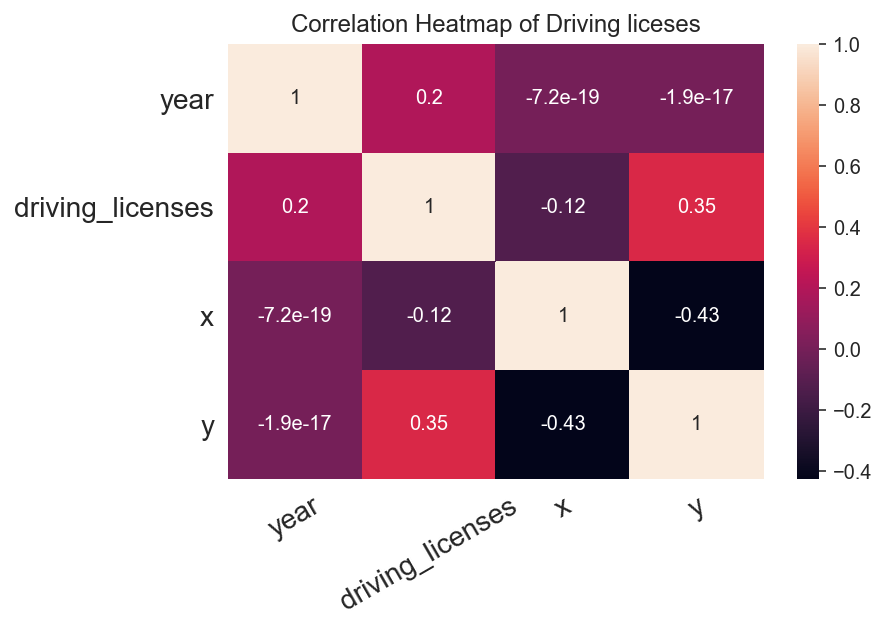

In [41]:
# Define the correaltion matrix of driving licenses dataset
corrs = driving_licenses_df_1.corr()
ax = sns.heatmap(corrs, annot=True)

# Set titles, labels, etc here for heatmap
ax.set_title('Correlation Heatmap of Driving liceses')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0);

<b style="color:blue;">Answer: </b> There are correlations between fields in Driving licenses dataset like `x` and `y`, and `driving_licenses` and `y`.

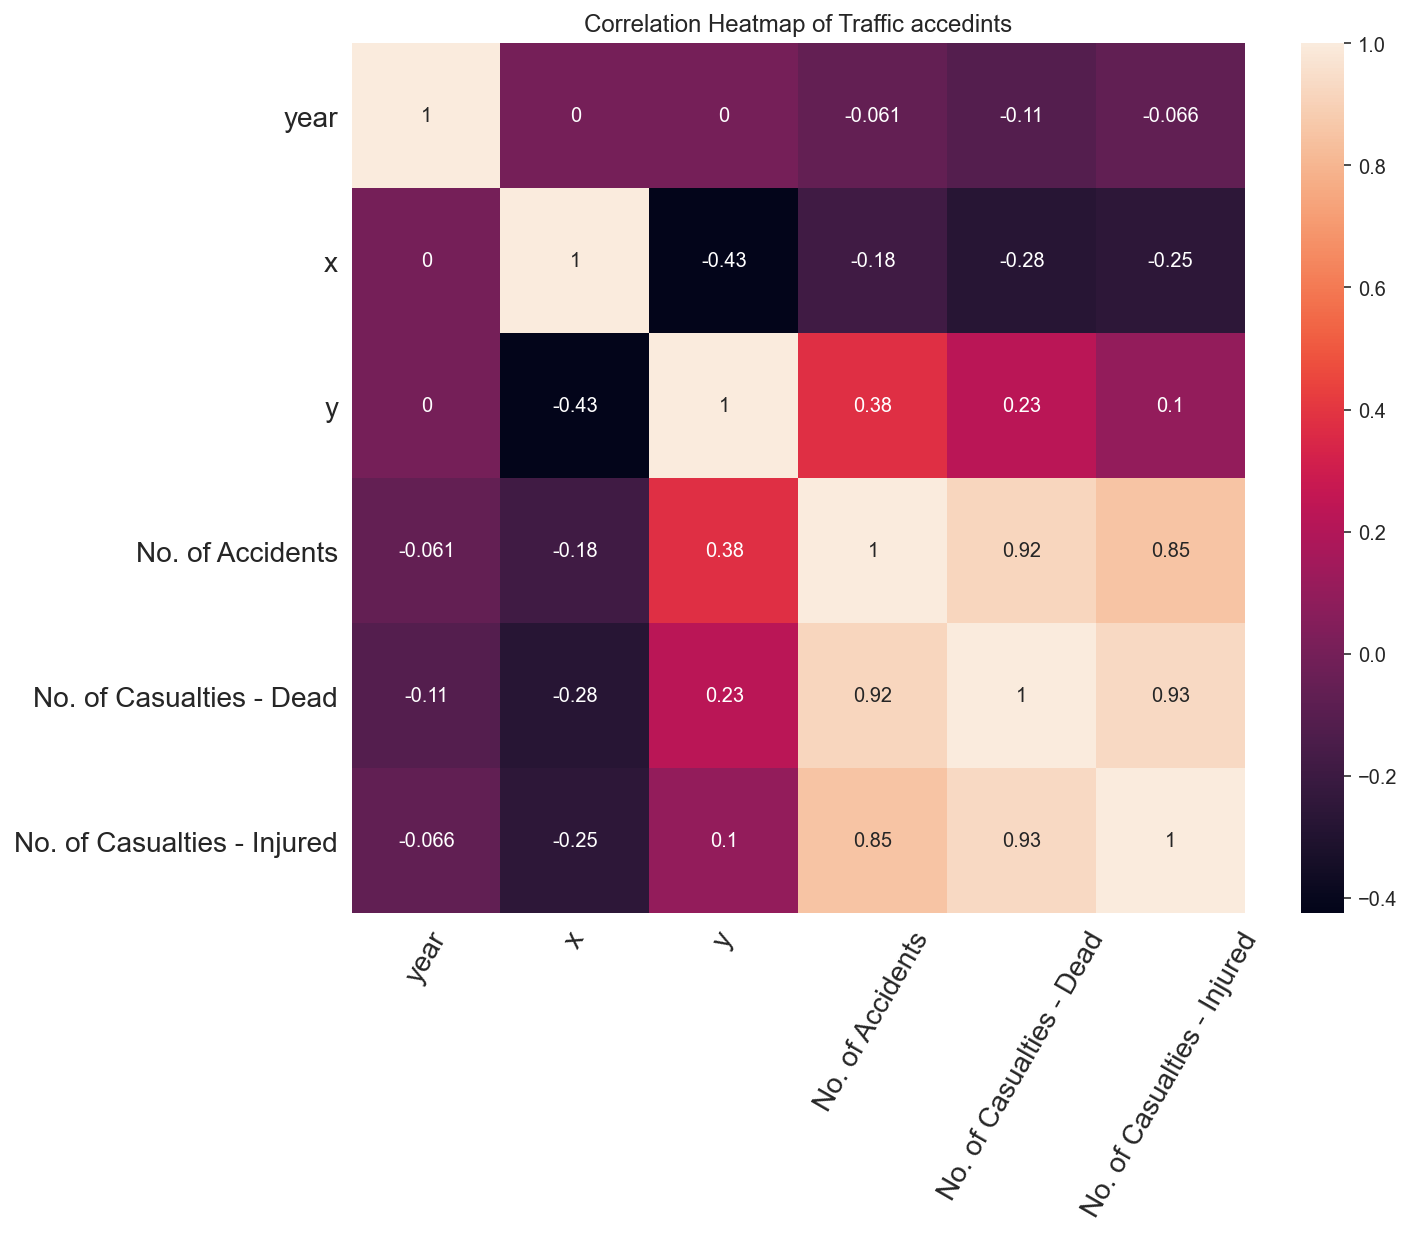

In [42]:
# Define the correaltion matrix of traffic accident dataset
corrs = traffic_accidents_df_2.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(corrs, annot=True)

# Set titles, labels, etc here for heatmap
ax.set_title('Correlation Heatmap of Traffic accedints')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=60)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0);

<b style="color:blue;">Answer: </b> There are correlations between fields in Traffic accedints dataset that `No. of Accidents`, `No. of Casualties - Dead` and `No. of Casualties - Injured`. As a result, the more accidents more casualties.

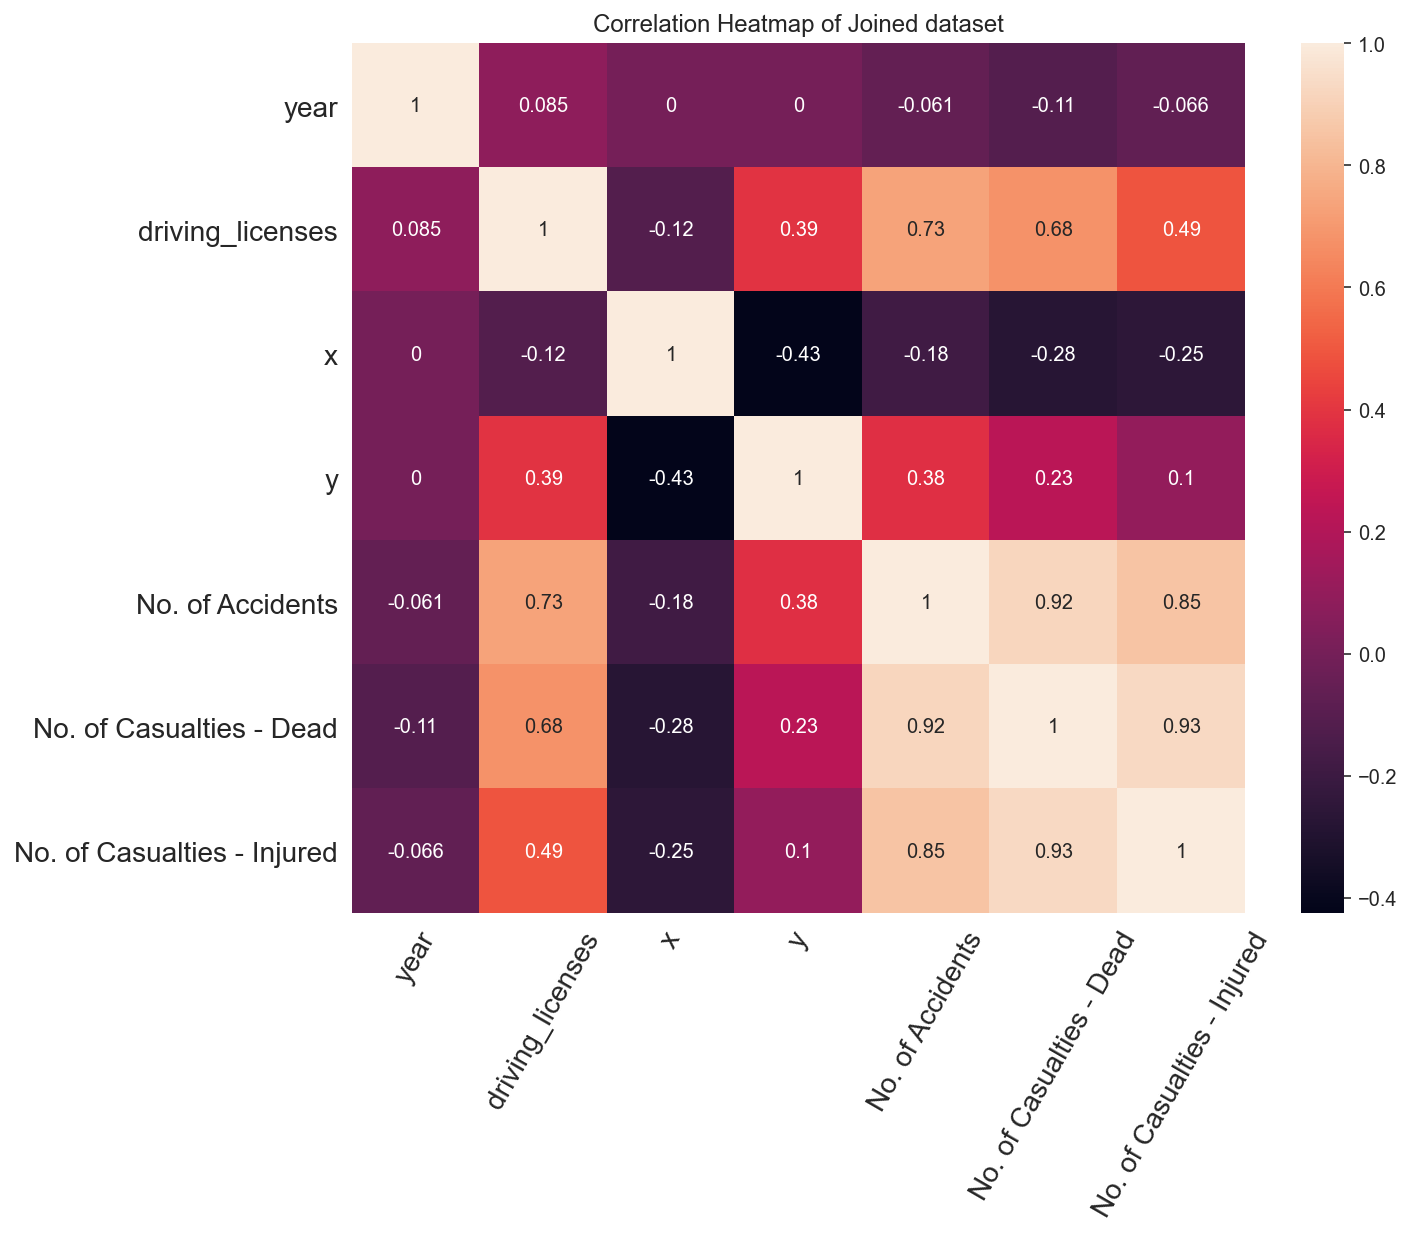

In [43]:
# Define the correaltion matrix of joined dataset
corrs = joined_df.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(corrs, annot=True)

# Set titles, labels, etc here for heatmap
ax.set_title('Correlation Heatmap of Joined dataset')
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=60)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0);

<b style="color:blue;">Answer: </b> There are correlations between fields in joined dataset like `driving_licenses`, `No. of Accidents`, `No. of Casualties - Dead` and `No. of Casualties - Injured`. Therefore, the increased of driving licenses may lead to more traffic accidents.

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [44]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(12,6)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.patch.set_facecolor('white')
    fig.tight_layout(pad=3)
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=15) # feel free to add more settings
        
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('Count')
    
    #Save the polt as image
    plt.savefig('Histograms plot.png')

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

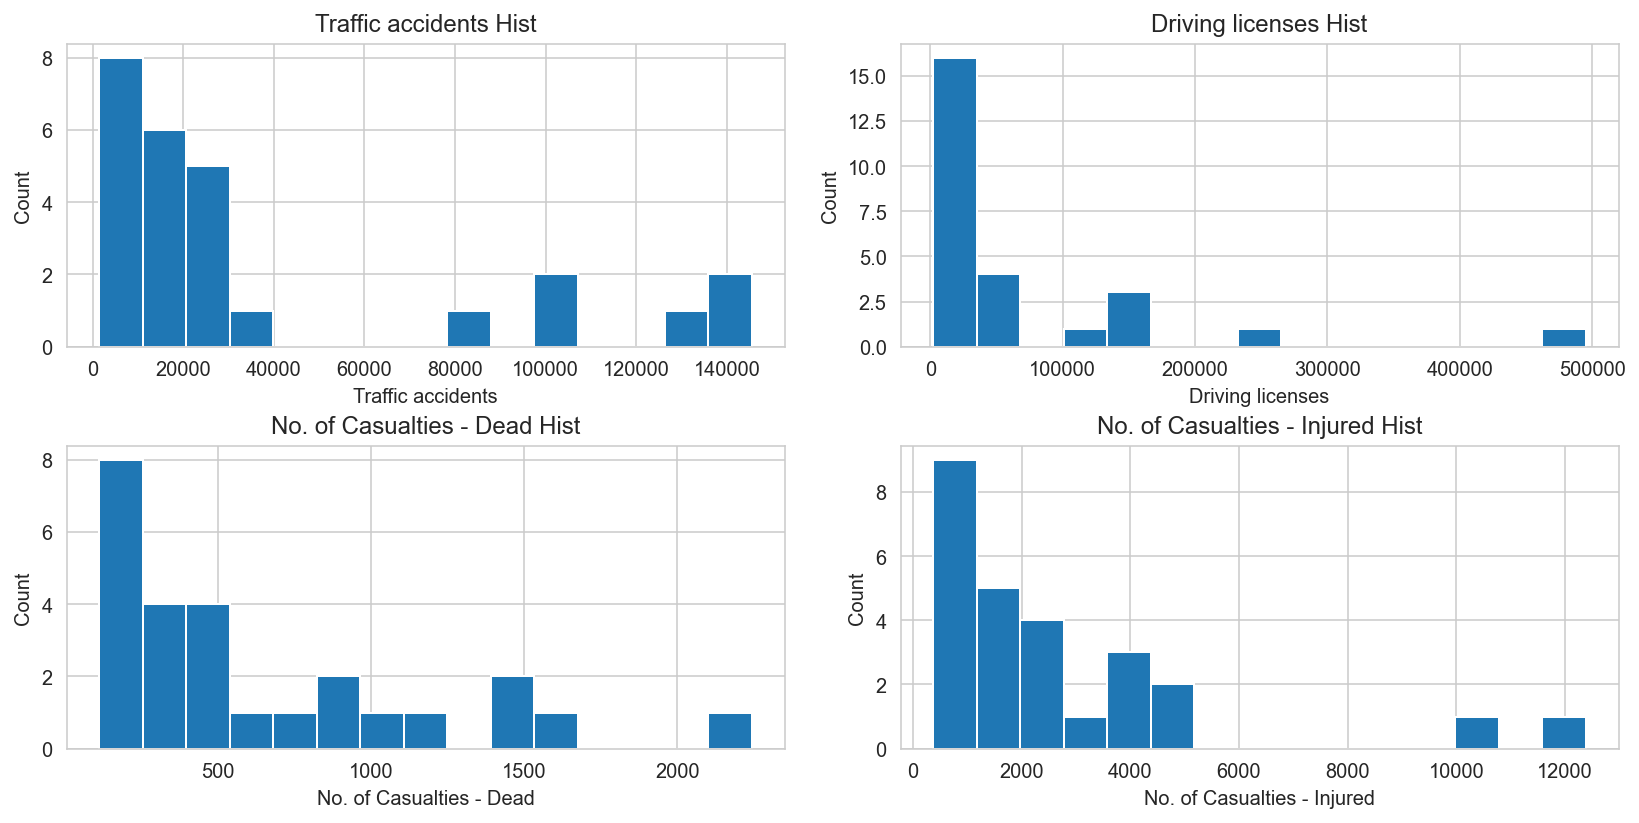

In [45]:
# Code
subplot_histograms(joined_df,['No. of Accidents','driving_licenses','No. of Casualties - Dead','No. of Casualties - Injured'],['Traffic accidents Hist','Driving licenses Hist','No. of Casualties - Dead Hist','No. of Casualties - Injured Hist'],['Traffic accidents','Driving licenses','No. of Casualties - Dead','No. of Casualties - Injured'])

 <b style="color:blue;">Answer: </b> According to the plots, these fields are positively skewed which means their mean highier than median and mode. As well as, there is possible chance to be an outlier in datasets.

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


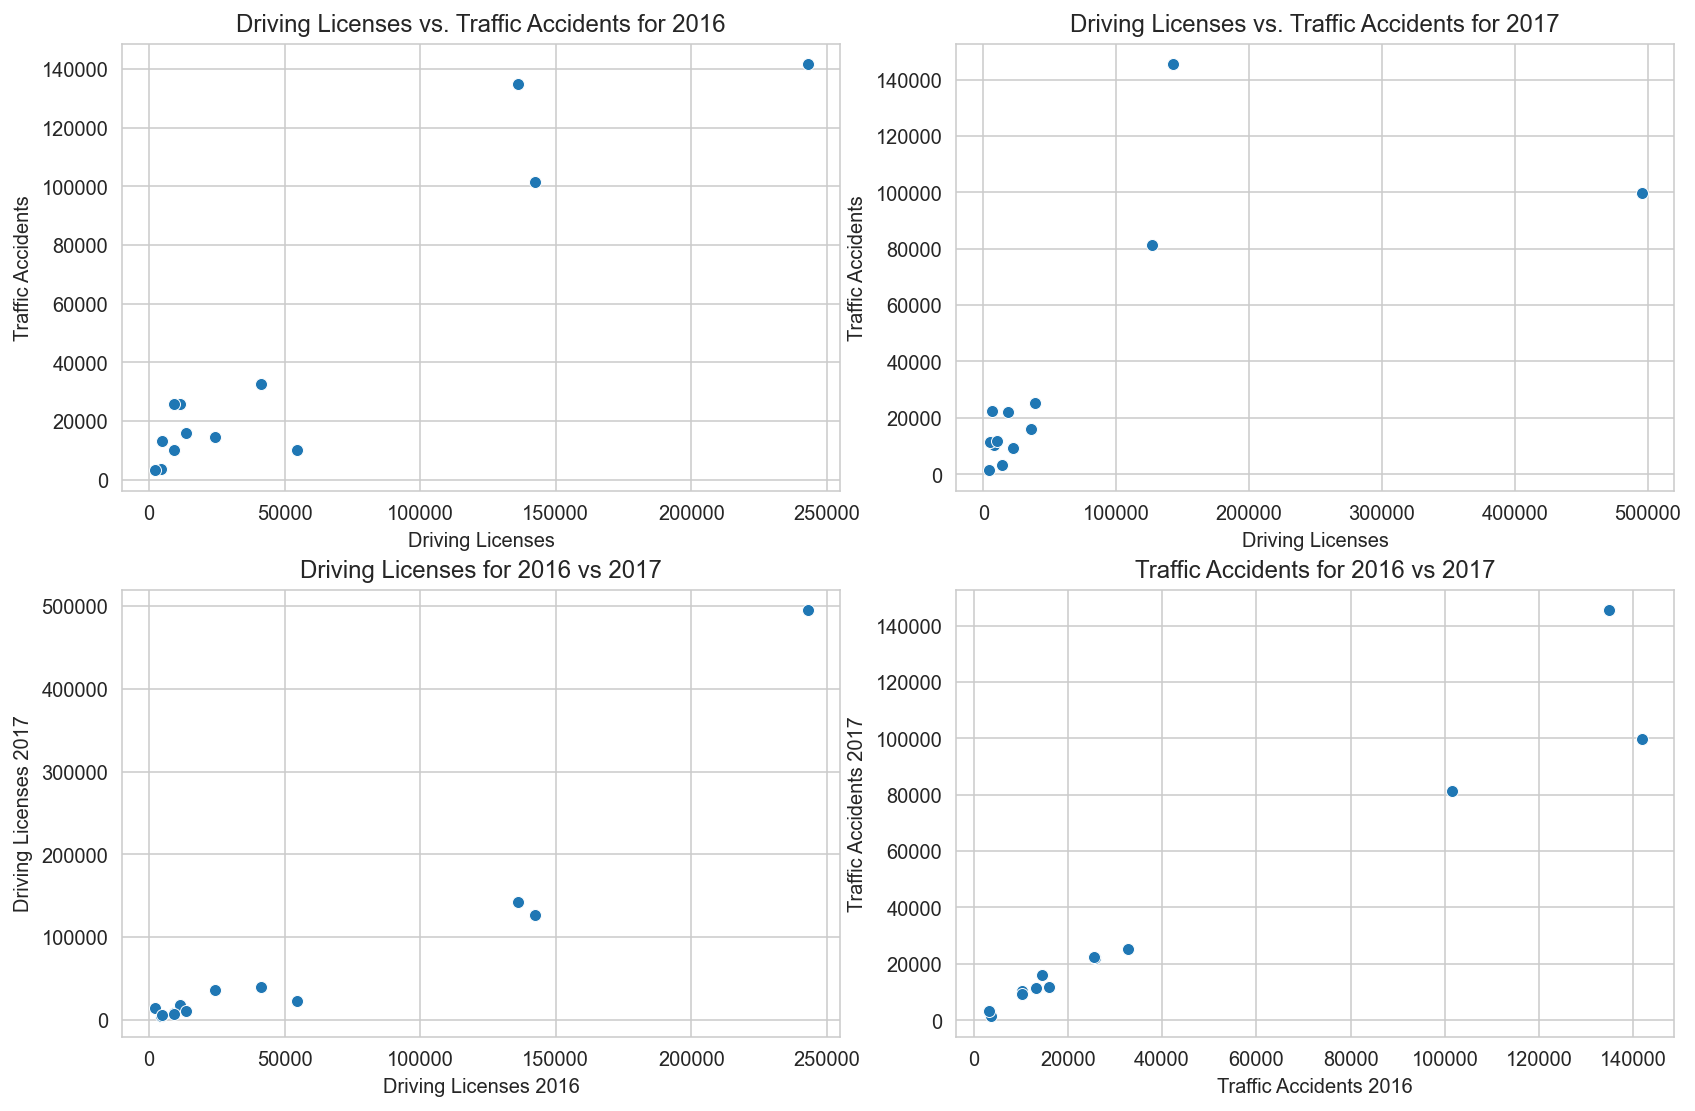

In [46]:
# Code
def subplot_scatterplots(dataframe, list_years):
    
    # Grouping the dataframe to ues year as index in scatterplot
    dataframe = dataframe.groupby(by=['year','region']).agg({
    'driving_licenses': 'max',
    'No. of Accidents': 'max'
    })

    fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(12,8)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.tight_layout(pad=3)
    for i, year in enumerate(list_years): # Gives us an index value to get into all our lists
        sns.scatterplot(ax=ax[i], x = dataframe.loc[year].driving_licenses, y = dataframe.loc[year]['No. of Accidents']) # feel free to add more settings
        if i == 0: #filter based on year, i equal to 0 for 2016 otherwise it will be 2017
            
            # Set titles, labels, etc here for Driving License subplot 
            sns.scatterplot(ax=ax[i+2], x = dataframe.loc[year].driving_licenses, y = dataframe.loc[year+1].driving_licenses)
            ax[i+2].set_title(f'Driving Licenses for {year} vs {year+1}')
            ax[i+2].set_xlabel('Driving Licenses 2016')
            ax[i+2].set_ylabel('Driving Licenses 2017')
        else:
            
            # Set titles, labels, etc here for Traffic Accidents subplot
            sns.scatterplot(ax=ax[i+2], x = dataframe.loc[year-1]['No. of Accidents'], y = dataframe.loc[year]['No. of Accidents'])
            ax[i+2].set_title(f'Traffic Accidents for {year-1} vs {year}')
            ax[i+2].set_xlabel('Traffic Accidents 2016')
            ax[i+2].set_ylabel('Traffic Accidents 2017')
        
        # Set titles, labels, etc here for Driving Licenses vs. Traffic Accidents subplot
        ax[i].set_title(f'Driving Licenses vs. Traffic Accidents for {year}')
        ax[i].set_xlabel('Driving Licenses')
        ax[i].set_ylabel('Traffic Accidents')
        
subplot_scatterplots(joined_df,[2016,2017])

<b style="color:blue;">Answer: </b> According to the plots, the driving licenses has a positively correlation with traffic accidents as well it is moderate. However, the traffic accidents are inevitable but with new rules in 2017, the correlation becomes weaker than pervoius one which is the result of safe driving awareness. In other hand, the <a href="https://twitter.com/eMoroor/status/890316031641747456?s=20">restrcations</a> on driving licenses help in increasing of safe driving awareness and reducing the traffic accidents.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [47]:
def var_standardized(var):        
    var_stand = (var-var.mean())/var.std()
    if 'year' in var.columns:
        return var_stand.drop(columns = ['year'])
    else:
        return var_stand

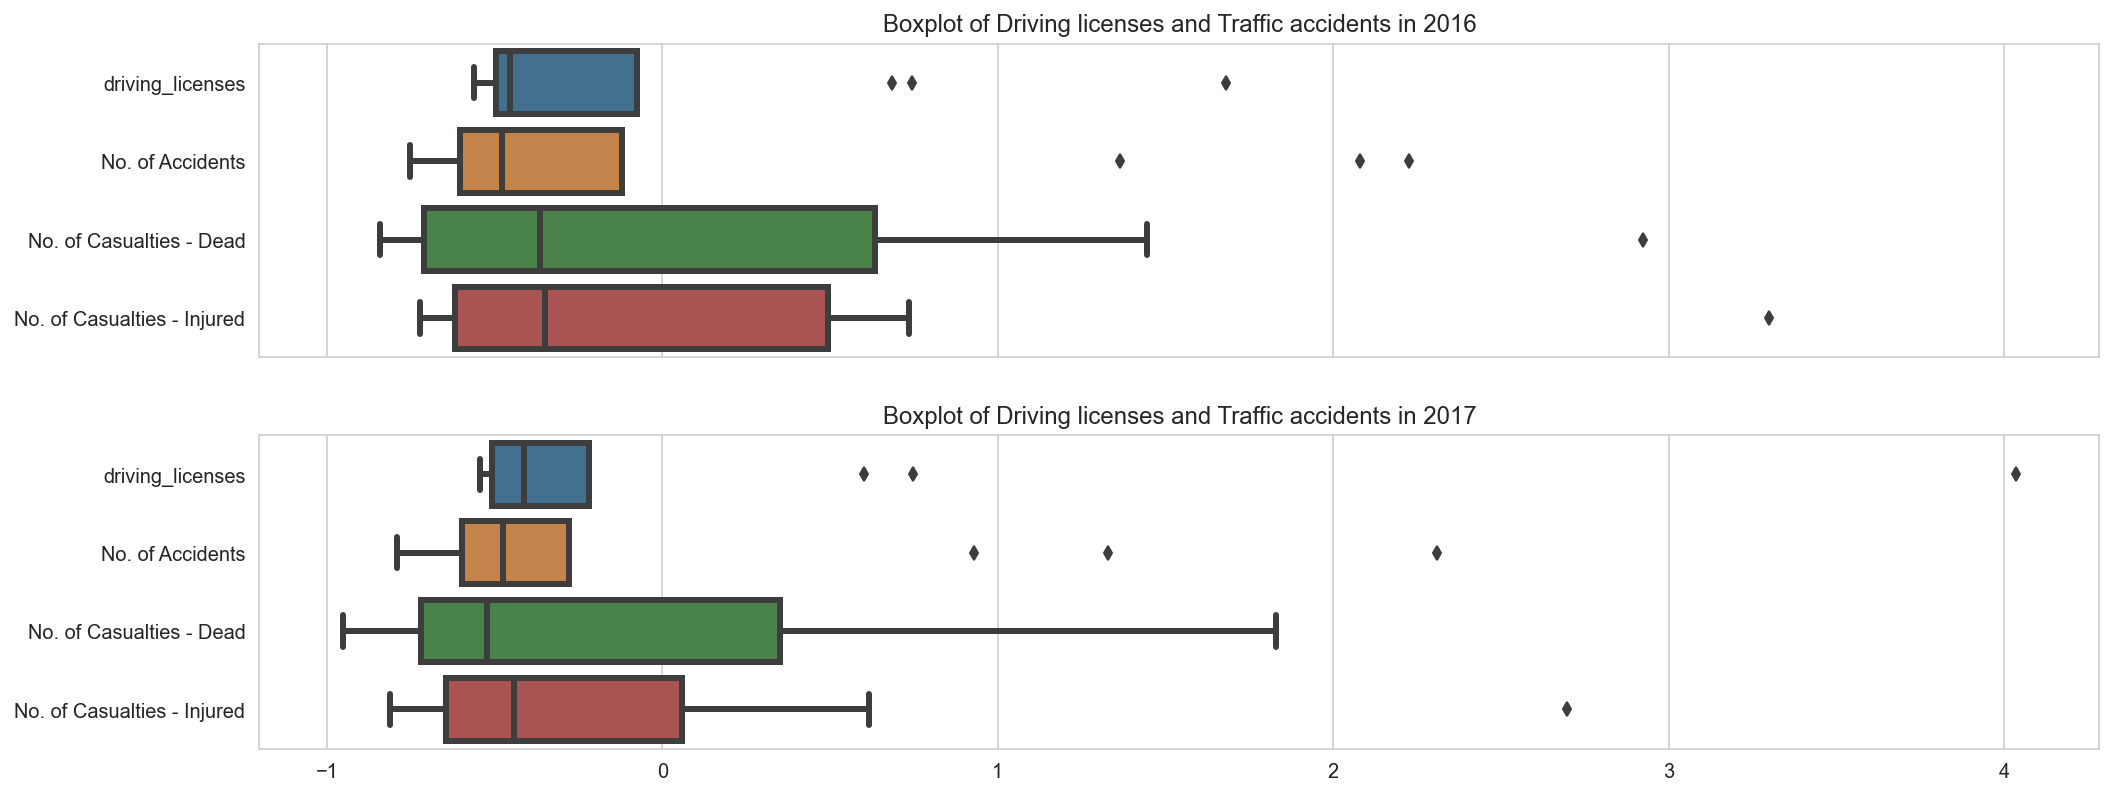

In [48]:
# Code
#Make copy of joined dataframe to standardize the specific columns
joineds_df = joined_df.copy()
columns_s = ['driving_licenses','No. of Accidents','No. of Casualties - Dead','No. of Casualties - Injured']
joineds_df [columns_s] = var_standardized(joineds_df [columns_s])

fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(14,6), sharex=True)
fig.tight_layout(pad=3)

#Assign dataframe that contains data of 2016 only as boxplot data
sns.boxplot(ax=ax[0],data=joineds_df[joineds_df.year == 2016].drop(columns=['year','x','y']),orient='h', fliersize=5, 
            linewidth=3, notch=False, saturation=0.5)
ax[0].set_title('Boxplot of Driving licenses and Traffic accidents in 2016')

#Assign dataframe that contains data of 2017 only as boxplot data
sns.boxplot(ax=ax[1],data=joineds_df[joineds_df.year == 2017].drop(columns=['year','x','y']),orient='h', fliersize=5,
            linewidth=3, notch=False, saturation=0.5)
ax[1].set_title('Boxplot of Driving licenses and Traffic accidents in 2017');

plt.show()

<b style="color:blue;">Answer: </b> As the above plots represented, there are regions as outliers on `driving_licenses`, `No. of Accidents` and `No. of Casualties` in 2016 and 2017. However, those outliers have been reduced in 2017 due to the issued resolutions at that year as it published <a href="https://twitter.com/eMoroor/status/890316031641747456?s=20">here</a>.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [49]:
#Load dataset of traffic accidents 2018
traffic_accidents_df_2018 = pd.read_csv('../data/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2018.csv',delimiter=';')

#Clean dataset of traffic accidents 2018
traffic_accidents_df_2018.drop(traffic_accidents_df_2018[traffic_accidents_df_2018.Region == 'Total'].index, inplace=True)
traffic_accidents_df_2018.drop('geo_shape',axis=1,inplace=True)

#Modify the columns name to lower case
traffic_accidents_df_2018.columns = [str.lower(column) for column in traffic_accidents_df_2018.columns]

#Create x and y columns
traffic_accidents_df_2018[['x','y']] = traffic_accidents_df_2018.apply(lambda x: list(map(float,x.geo_point_2d.split(','))),axis=1,result_type='expand')

#Change the format from long to wide
traffic_accidents_df_2018 = traffic_accidents_df_2018.pivot(index=['region','year','geo_point_2d','x','y'],columns=['indicator'],values='value').reset_index()

#Concate the two dataframe by column axis
traffic_accidents_df_3 = pd.concat([traffic_accidents_df_2,traffic_accidents_df_2018],axis=0)

#Change data type of year to string 
traffic_accidents_df_3 = traffic_accidents_df_3.astype({"year": str})
traffic_accidents_df_2018_grouped = traffic_accidents_df_3.groupby(by=['year']).agg({
    'No. of Accidents': 'sum'
    }).reset_index()

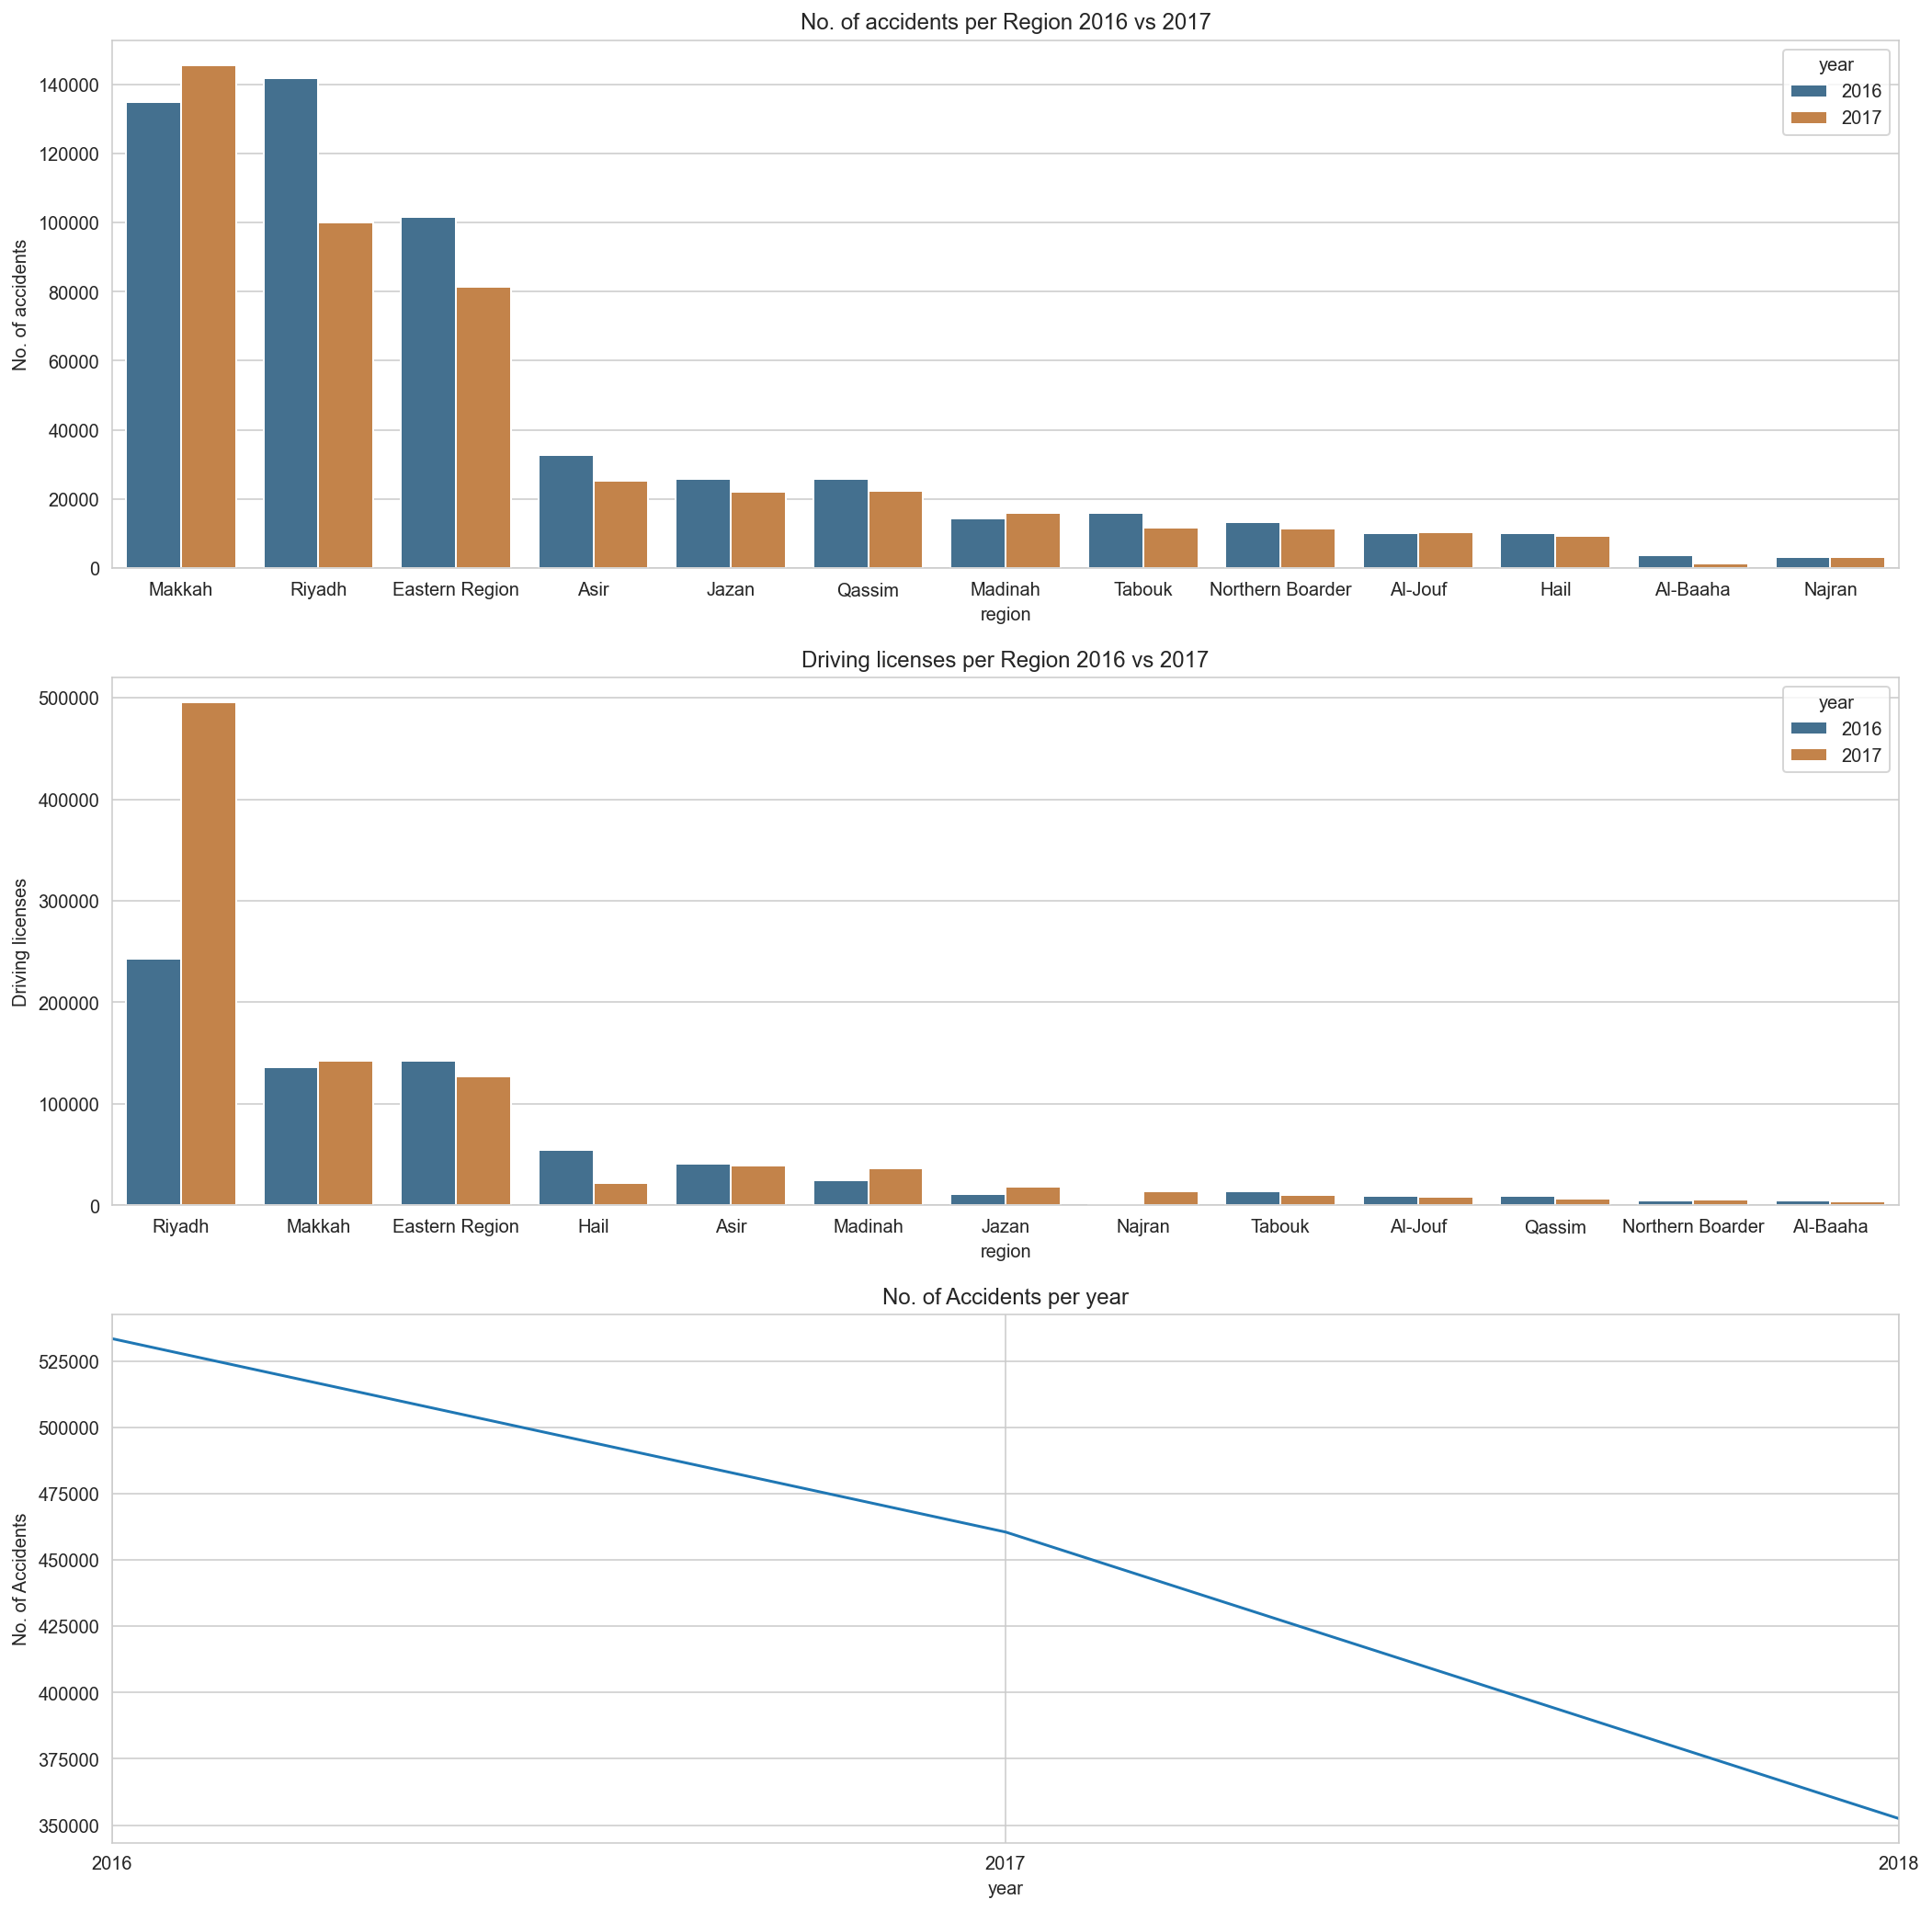

In [50]:
fig,ax=plt.subplots(nrows=3,ncols=1,figsize=(15,15))
fig.tight_layout(pad=4)

#Set background color 
fig.patch.set_facecolor('white')
plt.margins(x=0)

for index,name in enumerate(['No. of Accidents','driving_licenses']):
    
    #Assign each column to bar plot
    sns.barplot(ax=ax[index],
                x='region',
                y=name,
                hue='year',
                data = joined_df.sort_values(name,ascending=False),
               saturation=0.5)
    
    #Modify the column name
    name = name.replace('_',' ').capitalize()
    ax[index].set_ylabel(name)
    ax[index].set_title(f'{name} per Region 2016 vs 2017')

ax[2] = sns.lineplot(data=traffic_accidents_df_2018_grouped, x="year",y='No. of Accidents')
ax[2].set_title('No. of Accidents per year')

#Save the polt as image
plt.savefig('Accidents - Driving licenses plots.png')
plt.show()

<b style="color:blue;">Answer: </b> `The No. of accidents` has been reduced as comparison between 2016 and 2017 in the above plots. As a result, it proves the new resolution has a huge postive effect on the population of SA. Also, the issued driving licenses has been increased slowly per region except Riyadh due to restrcations as we metioned in scatterplot. 

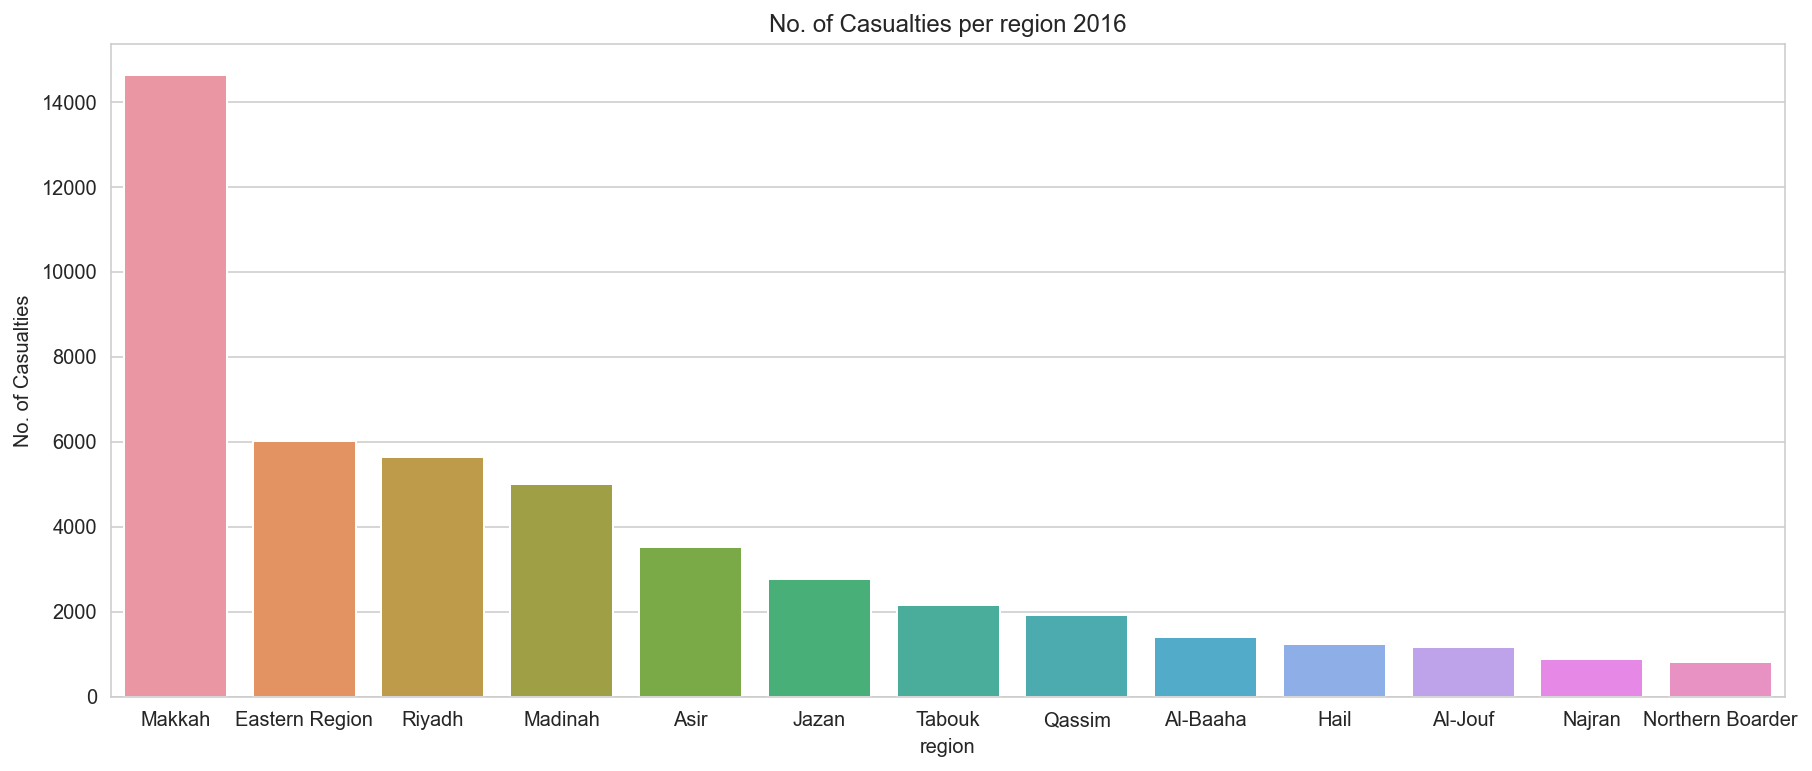

In [51]:
#Add new column by sum of No. of Casualties - Dead and No. of Casualties - Injured
traffic_accidents_df_2['No. of Casualties'] = traffic_accidents_df_2['No. of Casualties - Dead']+traffic_accidents_df_2['No. of Casualties - Injured']

#Filter dataframe by year
traffic_accidents_df_2_filtered = traffic_accidents_df_2[(traffic_accidents_df_2.year == 2016)][['region','No. of Casualties']]
plt.figure(figsize=(15, 6))
sns.barplot(data = traffic_accidents_df_2_filtered.sort_values('No. of Casualties',ascending=False),x='region',y='No. of Casualties')
plt.title(label='No. of Casualties per region 2016');

Makkah region has huge number of casualties which is more than the sum of Eastern region and Riyadh. As a result, the traffic accident of Makkah is more dangerous that Riyadh which has lagrest number of accident in 2016. 

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

<b style="color:blue;">Answer: </b> 
In both datasets, they have `x` and `y` which are normally distributed that refers the data is not biased toward to specific geolocation. Also, the `traffic_accidents`  and `driving_licenses` are postive skewed due to the outliers that leads the distribution to skew. The following plots show that.

<img id="img1" style="width:100%;" src="Histograms plot.png">

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

<b style="color:blue;">Answer: </b> According to the central limit theorem, we will not have normal distribution even the variables of datasets are randomly independent because of the number of records is less that 30 in joined dataset that is minimum limit of theorem.

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

<b style="color:blue;">Answer: </b> The driving licenses and traffic accidents have been positively skewed due to outliers that leads the distribution toward the direction of outliers. Also, the mean affected by outlier which becomes larger than the median and it is sign of skewed data. Therefore, the alogrithms performance affected due to outliers like Linear Regression and K-Nearest-Neighbors<sup>[<a href="#ref1">1</a>] [<a href="#ref2">2</a>]</sup>.
<br>

In [52]:
print('The mean of driving licenses', round(driving_licenses_df_1.driving_licenses.mean(),2))
print('The median of driving licenses', round(driving_licenses_df_1.driving_licenses.median(),2))
print('The mode of driving licenses', round(driving_licenses_df_1.driving_licenses.mode()[0],2))
print('')
print('The mean of traffic accidents', round(traffic_accidents_df_2['No. of Accidents'].mean(),2))
print('The median of traffic accidents', round(traffic_accidents_df_2['No. of Accidents'].median(),2))
print('The mode of traffic accidents', round(traffic_accidents_df_2['No. of Accidents'].mode()[0],2))

The mean of driving licenses 28915.35
The median of driving licenses 10267.0
The mode of driving licenses 915

The mean of traffic accidents 38225.69
The median of traffic accidents 16050.5
The mode of traffic accidents 1414


The descriptive Statistics results prove the both datasets are positively skewed distribution when the mean are greater than median and mode. Also, the mode is the smallest value that statify the general realtionship of positively skewed distribution.<sup>[<a href="#ref3">3</a>]</sup>

<h3>References</h3>
1. <a id="ref1" href="https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37">Skewed Data: A problem to your statistical model</a><br>
2. <a id="ref2" href="https://www.fromthegenesis.com/pros-and-cons-of-k-nearest-neighbors/">Pros and Cons of K-Nearest Neighbors</a><br>
3. <a id="ref3" href="https://corporatefinanceinstitute.com/resources/knowledge/other/positively-skewed-distribution/">Positively Skewed Distribution</a>

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [53]:
# Code

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

<b style="color:blue;">Answer: </b>
<br>
<p style="text-align:justify">Kingdom of Saudi Arabia (KSA) has many vital regions in different perspectives such as Riyadh, Makkah and Eastern Region. The space of KSA is so large which required 14 hours to travel by car from east to west. As well as, the KSA population is more than 27 million.<sup>[<a href="#ref1-out-r">1</a>]</sup> The vital regions in KSA are far from each other. For example, the distance between Riyadh and Makkah is 869 km which is a long distance. In this research, we have presented the observations of Riyadh, Makkah and Eastern Region in driving licenses and traffic accidents datasets.</p>
<br>
<p style="text-align:justify">&nbsp;&nbsp;&nbsp;The Makkah region located west of KSA. The famous places in this region such as the holy mosque, King Fahd's fountain and ‪Jeddah Corniche and so on.‬<sup>[<a href="#ref2-out-r">2</a>]</sup> Also, The Riyadh region has a capital city which is Riyadh, with many headquarter of companies and hosted entertainment events like Riyadh season. The Eastern region featured natural places like Al-Qarah mountain and half-moon beach as well as Qasr Ibrahim. Therefore, the economic and social factors engaged by tourism conditions. So, many people visit those regions on vacations. Those regions are the top 3 population on KSA (Makkah %25.4, Riyadh %24.9 and Eastern Region %15.1).<sup>[<a href="#ref1-out-r">1</a>]</sup> As a result, most traffic accidents located in those regions.<br><br>
<img id="img1" style="width:100%;" src="Accidents - Driving licenses plots.png">
<br><br>
&nbsp;&nbsp;&nbsp;The new resolutions issued in August 2016 include a traffic system. Moreover, the penalty has been increased on the accidents for who were involved in the accidents, drifting, cutting traffic signal and so on.‬<sup>[<a href="#ref3-out-r">3</a>]</sup> As the above plots have shown, the number of traffic accidents reduced in 2017 and 2018 by that new resolution in most regions. That shows the awareness of safe driving increased. Furthermore, the increase of the driving licenses issued related to the historical resolution that allows women to drive cars.<sup>[<a href="#ref4-out-r">4</a>]</sup> The infrastructure improvements of regions contributed to reducing traffic accidents.<sup>[<a href="#ref5-out-r">5</a>]</sup> Those regions considered traffic accidents as a serious problem reflected in the dataset.</p>
<h3>References</h3>
1.<a id="ref1-out-r" href="https://www.stats.gov.sa/sites/default/files/Ar-census31-prim-03.pdf">Kingdom of Saudi Arabia - Population 2010 G</a><br>
2.<a id="ref2-out-r" href="https://www.tripadvisor.com/Attractions-g2628879-Activities-Makkah_Province.html">Tours and Sightseeing in Makkah region</a><br>
3.<a id="ref3-out-r" href="https://www.moi.gov.sa/wps/portal/Home/sectors/civilaffairs/contents/!ut/p/z0/fYy9DoIwFIVfhYWR3EvTII4NiQjGROMgdmkabKQqt4IN-PgC7i4n5-fLAQkVSNKDvWlvHennlC8yUVhwvo0526X8sEFxZGUmsoLl-xWcdA8lyP_Q9GLvXScFyNqRNx8PVetscLWjphBn27jWBMtIPsQ5hUhmfP800H3d2MEsrJobhesI04hhnGhlCF6P_PwFMzNpog!!/">Chairs cabinet's session August 2016 G</a><br>
4.<a id="ref4-out-r" href="https://www.spa.gov.sa/1671323">The decision to allow women to drive</a><br>
5.<a id="ref5-out-r" href="https://www.alriyadh.gov.sa/ar/news/Pages/180318.aspx">Municipal councils in 1438 H</a>
<h3>Dataset</h3>
1.<a id="data1-out-r" href="https://www.stats.gov.sa/sites/default/files/Ar-census31-prim-03.pdf">Kingdom of Saudi Arabia - Population 2010 G</a><br>
2.<a id="data2-out-r" href="https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period&refine.time_period=2018">Traffic Accidents and Casualties 2018 G</a><br>

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

<b style="color:blue;">Answer: </b><br>
<p style="text-align:justify">The diversity of life in KSA leads the community to explore themself like getting jobs and tourism. The population growth appears in driving licenses. Makkah, Riyadh and Eastern Region are top 3 among many years in issued driving licenses. So, it is related to accidents which are more drivers more accidents probably. The findings in the traffic accidents dataset prove the previous fact since the top 3 regions in driving licenses are the same in traffic accidents. The recommendations are focusing on the infrastructure of roads and emphasizing on the drivers to follow traffic rules on main roads to reduce the opportunity of accidents and traffic jams. Also, add more restrictions on issued new driving licenses. Those recommendations will save people from traffic accidents and encourage safe driving.</p>